## Визуализация

**В этом ноутбуке содержатся тренировочные материалы, решение задач с онлайн-курса по предобработке и анализу данных. Ниже представлен ряд заданий, при выполнении которых применялись различные способы визуализации.**

Содержание:
1. Pandas
2. Matplotlib  
3. Seaborn
4. Plotly

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html ">Документация Pandas (метод plot)</a>     
<a href="https://matplotlib.org/">Документация Matplotlib</a>      
<a href="https://seaborn.pydata.org/">Документация Seaborn</a>  
<a href="https://plotly.com/python/">Документация Plotly</a>

In [1]:
# Загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings; warnings.simplefilter('ignore')

%matplotlib inline
sns.set(rc = {'figure.figsize' : (5, 3)})  # Для настройки размера графиков 

init_notebook_mode(connected = True)       # Для работы с библиотекой Plotly в режиме оффлайн 
cf.go_offline()

#### Основная часть упражнений выполняется на примере датасета, который содержит информацию о посещении ресторана быстрого питания в США в начале 90-х годов (файл 'tips.csv'). 

#### Датасет содержит семь показателей:  
   - **total_bill** — общая сумма, уплаченная за заказ;  
   - **tip** — размер чаевых;  
   - **sex** — пол клиента;  
   - **smoker** — является ли клиент курильщиком (в 90-е годы в ресторанах США были зоны для курящих);  
   - **day** — день недели;  
   - **time** — время (обед или ужин);  
   - **size** — количество посетителей, обедавших за столом.

In [8]:
# Загрузим датасет и посомтрим на данные
df = pd.read_csv('tips.csv')
display(df.head())
print(df.shape)
display(df.info())
display(df.describe())
display(df.describe(include = 'object'))
print(f'Кол-во пропусков: {df.isna().sum().sum()}')
print(f'Кол-во уникальных значений: \n{df.nunique()}')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


(244, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


None

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


Кол-во пропусков: 0
Кол-во уникальных значений: 
total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64


## 1. Pandas  
### метод plot

#### 1) Постройте гистограмму распределения признака total_bill с параметрами grid и title. 

<AxesSubplot:title={'center':'Общая сумма счета'}, ylabel='Frequency'>

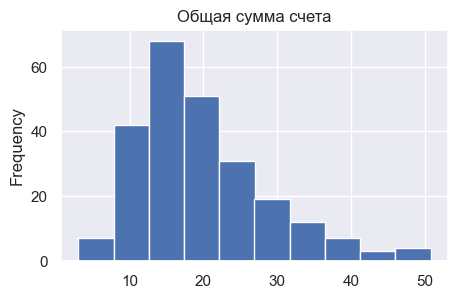

In [14]:
df.total_bill.plot(kind = 'hist', grid = True, title = 'Общая сумма счета')  # df.total_bill.hist()

#### 2) Постройте столбчатую диаграму распределения посетителей по дням недели.

<AxesSubplot:title={'center':'Количество посетителей по дням'}>

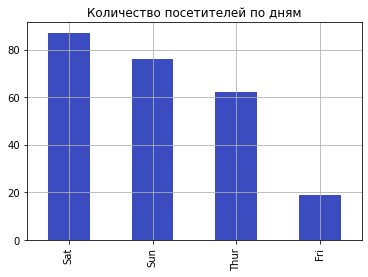

In [16]:
# При работе с категориальными переменными с помощью метода plot, датафрейм необходимо предварительно обработать
# Посчитаем, сколько заказов пришлось на каждый из дней и построим график
df.day.value_counts().plot(kind = 'bar', grid = True, colormap = 'coolwarm', title = 'Количество посетителей по дням')

#### 3) Постройте столбчатую диаграму распределения среднего размера чаевых, оставленных женщинами в зависимости от их отношения курению.  

<AxesSubplot:xlabel='sex,smoker'>

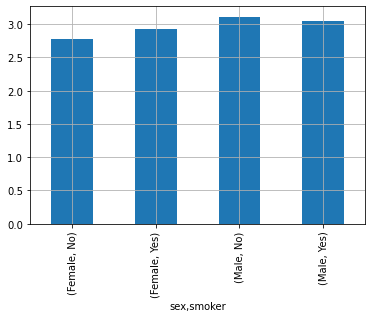

In [25]:
df.groupby(['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid = True)

<AxesSubplot:title={'center':'Средний размер чаевых, оставленных женщинами в зависимости от их отношения курению'}, xlabel='smoker'>

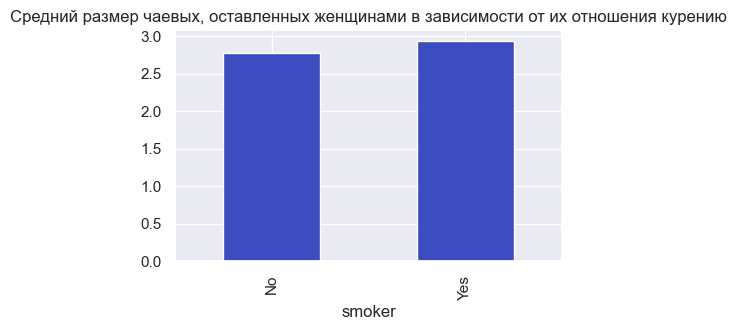

In [30]:
df[df.sex == 'Female'].groupby('smoker').tip.mean().plot(kind = 'bar', grid = True, colormap = 'coolwarm', title = 'Средний размер чаевых, оставленных женщинами в зависимости от их отношения курению')

#### 4) Разместите два графика 'total_bill' и 'tip' в одной рабочей области.

array([<AxesSubplot:title={'center':'Общая сумма счета'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Размер чаевых'}, ylabel='Frequency'>],
      dtype=object)

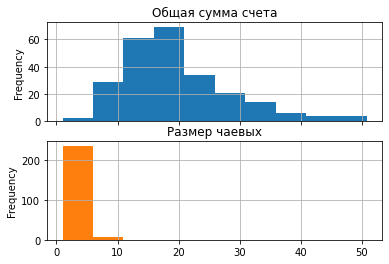

In [34]:
df[['total_bill', 'tip']].plot(kind = 'hist', subplots = True, grid = True, legend = False, title = ['Общая сумма счета', 'Размер чаевых'])

#### 5) Постройте график типа scatter plot с признаками 'total_bill' и 'tip', проанализируйте взаимосвязь.

График показывает, что более щедрые чаевые обычно оставляют посетители, которые делают более дорогие заказы, а также видны исключения из правила.

<AxesSubplot:title={'center':'Общая сумма счёта Vs сумма чаевых'}, xlabel='total_bill', ylabel='tip'>

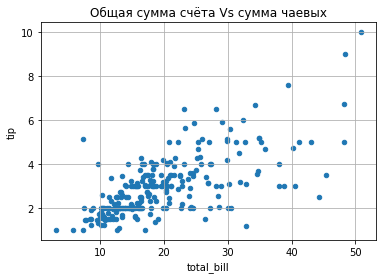

In [28]:
df.plot(kind = 'scatter', x =  'total_bill', y = 'tip', grid = True, title = 'Общая сумма счёта Vs сумма чаевых' )

#### 6) Отобразите на графике средние значения суммы счёта и размера чаевых по дням недели.

<AxesSubplot:xlabel='day'>

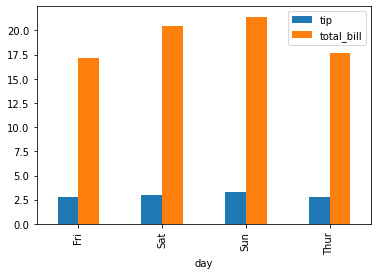

In [42]:
# Если необходимо совместить на графике несколько качественных и количественных показателей, 
# то датафрейм следует предварительно обработать. 

# df.groupby('day')[['total_bill', 'tip']].mean().plot(kind = 'bar')    # kind = 'barh'
df.pivot_table(values = ['total_bill', 'tip'], index = 'day', aggfunc = 'mean').plot(kind = 'bar')

#### 7) Постройте график распределения клиентов ресторана, оставляющих чаевые, по полу и отношению к курению. 

In [45]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


<AxesSubplot:xlabel='sex,smoker'>

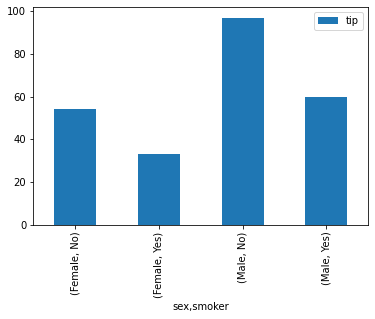

In [50]:
# df.groupby(['sex','smoker']).tip.sum().plot(kind='bar')

df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

#### 8) Постройте график, отображающий среднюю сумму чаевых, которые оставляют курящие и некурящие посетители.

<AxesSubplot:xlabel='smoker'>

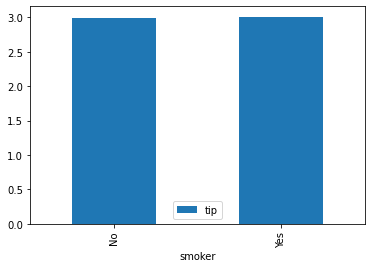

In [67]:
df.pivot_table(values = 'tip', index = ['smoker'], aggfunc = 'mean').plot(kind = 'bar')

<AxesSubplot:ylabel='smoker'>

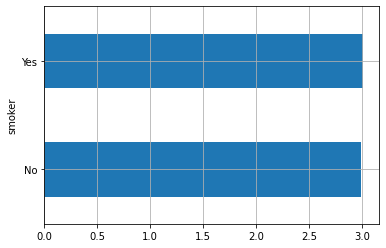

In [66]:
df.groupby('smoker')['tip'].mean().plot(kind = 'barh', grid = True) 

## 2. Matplotlib

### Объектно-ориентированный подход к созданию графиков в Matplotlib  
Процесс работы над графиком начинается с создания объекта, содержащего необходимую информацию и настройки. К созданному объекту добавляются координатная плоскость и другие графические объекты.

#### 9) Постройте гистограмму распределения признака «Общая сумма счёта», установите цвет диаграммы, увеличьте количество столбцов для демонстрации распределения (20),  добавьте заголовки к графику.

Text(0, 0.5, 'Количество заказов')

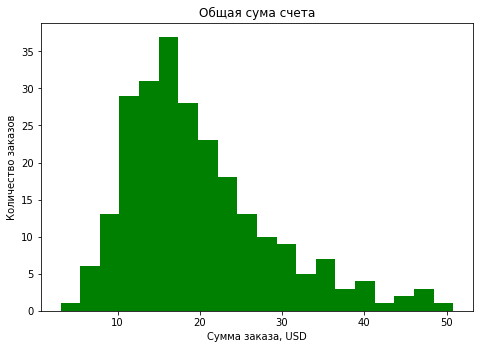

In [77]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сума счета')
axes.set_xlabel('Сумма заказа, USD')
axes.set_ylabel('Количество заказов')

#### 10) Отобразите на графике связь между суммой счёта и размером чаевых.

Text(0, 0.5, 'Размер чаевых')

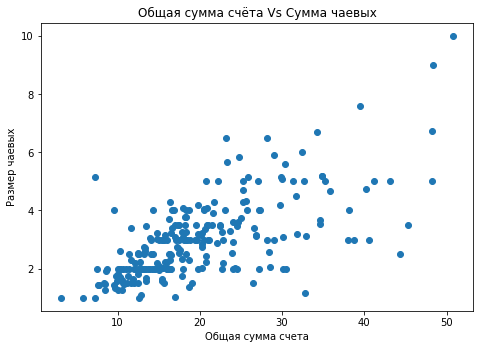

In [94]:
# df.plot(kind = 'scatter', x = 'total_bill', y = 'tip')

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Общая сумма счета')
axes.set_ylabel('Размер чаевых')

#### 11) Отобразите две системы координат на одном объекте. В основную координатную плоскость разместе гистограмму распределения признака «Общая сумма счета», а в дополнительную — данные о максимальном и минимальном значении этого признака по дням недели. 

In [4]:
# Для создания вспомогательного графика предварительно обработаем основной датафрейм и извлекем из него нужную информацию
bills_per_day = df.groupby(['day'])['total_bill'].agg(['min', 'max']).reset_index()
bills_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


<BarContainer object of 4 artists>

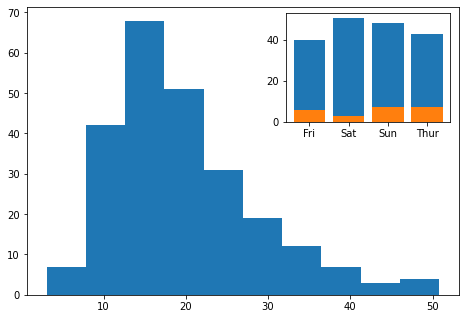

In [126]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'])

Недостатком графика является то, что на вспомогательной диаграмме столбцы перекрывают друг друга, из-за чего появляется риск потерять часть информации. Для решения этой проблемы подкорректируем настройки метода bar.

<BarContainer object of 4 artists>

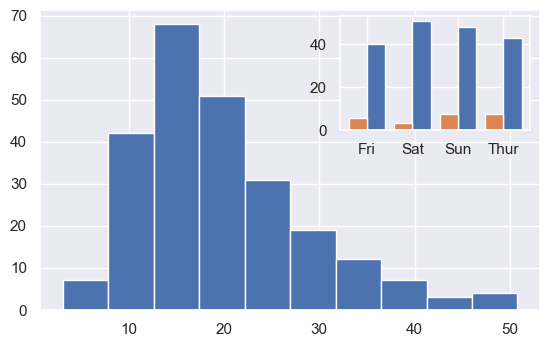

In [6]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], width = 0.4, align = 'edge')
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], width = -0.4, align = 'edge')

#### 12) Отобразите на графике данные о максимальном и минимальном значении признака «Общая сумма счета» по дням недели, добавьте легенду в правый верхний угол, увеличте максимальное значение оси ординат для корректного расположения легенды.

In [258]:
bills_per_day = df.groupby('day')['total_bill'].agg(['min', 'max']).reset_index()
bills_per_day 

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


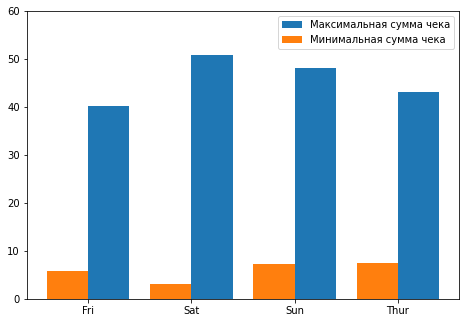

In [183]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

#### 13) Разместите в одном пространстве несколько графиков с помощью метода subplots ('total_bill', 'tip' и взаимосвязь этих двух признаков).

Text(0.5, 1.0, 'Общая сумма счета vs Сумма чаевых')

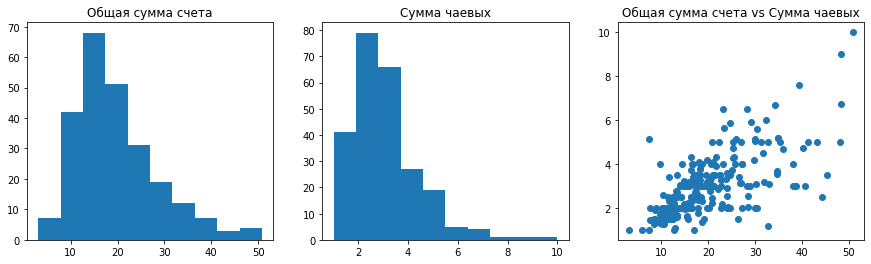

In [203]:
# df[['total_bill', 'tip']].plot(kind = 'hist', bins = 30, subplots = True, title = ['Общая сумма чека', 'Сумма чаевых'])

fig, axes = plt.subplots(1, 3, figsize = (15, 4))    # fig = plt.figure(figsize = (15, 4))      axes = fig.subplots(1, 3)
axes[0].hist(df['total_bill'])
axes[0].set_title('Общая сумма счета')
axes[1].hist(df['tip'])
axes[1].set_title('Сумма чаевых')
axes[2].scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes[2].set_title('Общая сумма счета vs Сумма чаевых')

#### Для выполнения следующих заданий будет использоваться специально сгенерированный одномерный массив NumPy.

Сгенерируем массив из 1000 чисел, равномерно распределённых в интервале от -3 до 3. Также создадим переменную, содержащую значения функции e^x на отрезке [-3, 3] и полином третьей степени.

In [216]:
x = np.linspace(-3, 3, 1000)
y1 = np.exp(x)
y2 = 10 + 0.4 * x - 0.3 * x**2 + 0.1 * x**3

#### 14) Отобразите на графике линии x, y1 и x, y2 

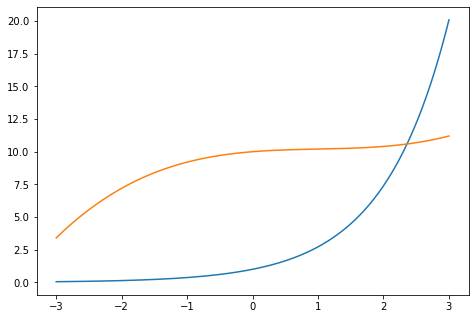

In [217]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y1)
axes.plot(x, y2)

#### 15) Отрисуйте линию в стиле "dashed line"

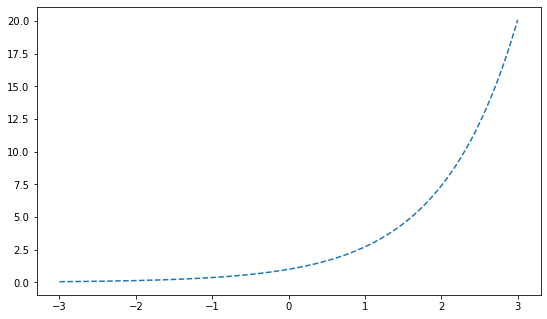

In [224]:
fig = plt.figure(figsize = (7, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y1, linestyle = '--')

#### 16) Отрисуйте линию в фиолетовом цвете с маркером ромба.

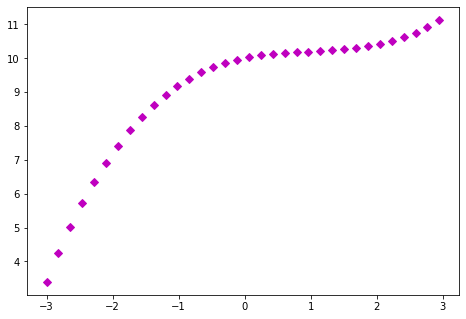

In [241]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x[::30],y2[::30], 'mD')

## 3. Seaborn

#### 17) Постройте гистограмму распределения признака 'total_bill' (метод distplot).

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

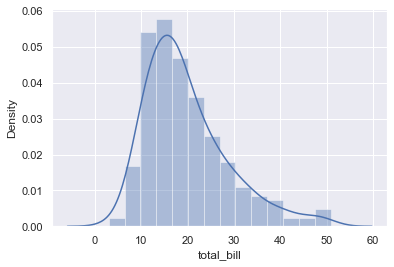

In [256]:
# Установим стандартные параметры отображения графиков и построим график
sns.set()

# sns.histplot(df.total_bill, kde = True)
sns.distplot(df['total_bill'])

#### 18) Разместите на одном графике гистограммы распределения двух признаков и покажите связь между ними ('total_bill' и 'tip').

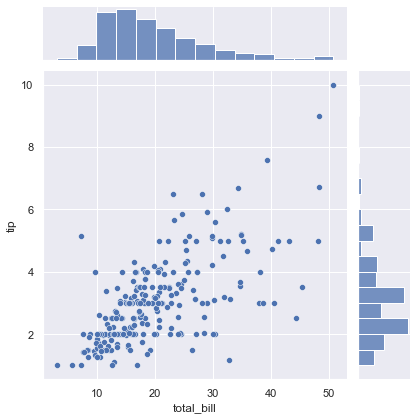

In [262]:
sns.jointplot(x = df['total_bill'], y = df['tip'])

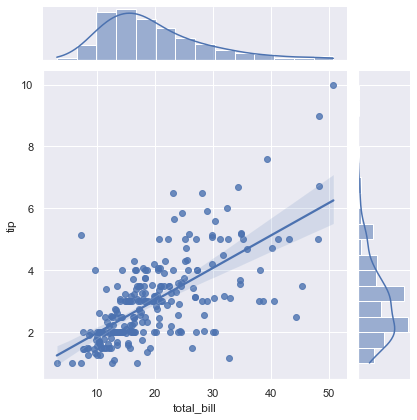

In [263]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg')

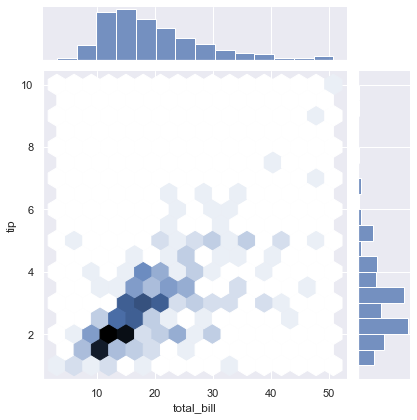

In [265]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'hex')

#### 19) Постройте график pairplot.

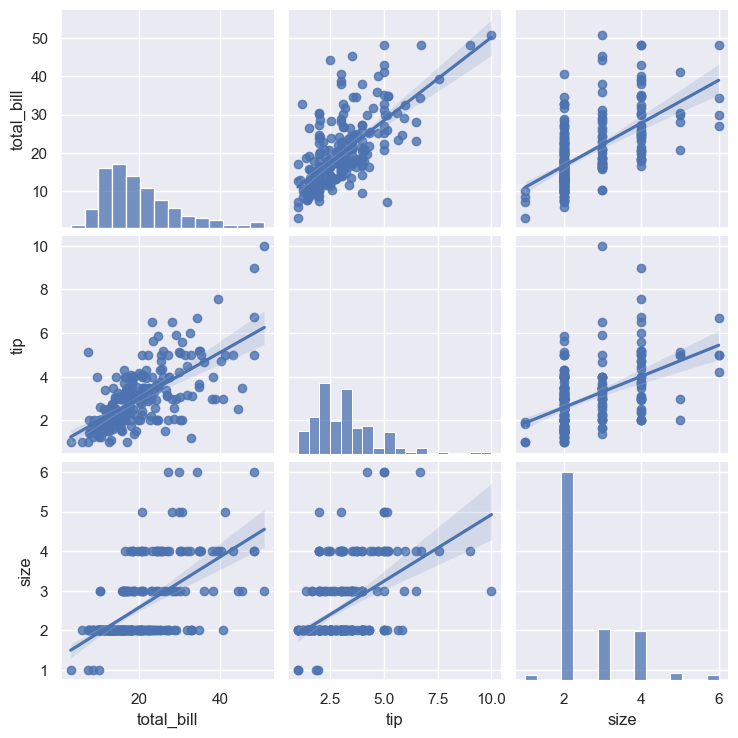

In [6]:
sns.pairplot(df, kind = 'reg')

#### 20) Постройте график pairplot, на каждой части которого разными цветами выделены данные о курящих и некурящих людях.

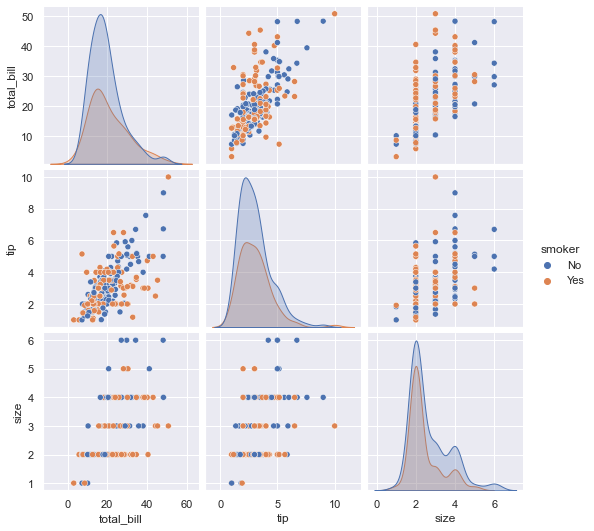

In [295]:
sns.pairplot(df, hue = 'smoker')

#### 21) Постройте гистограмму распределения категориального признака 'day'.

<AxesSubplot:xlabel='day', ylabel='count'>

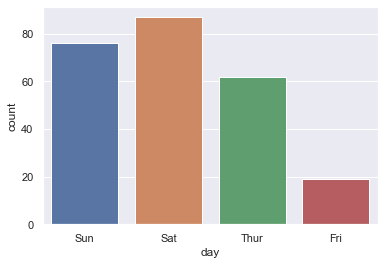

In [298]:
# sns.countplot(x = 'day', hue = 'sex', data = df)  # в зависимости от пола
sns.countplot(x = 'day', data = df)  

<AxesSubplot:xlabel='day', ylabel='count'>

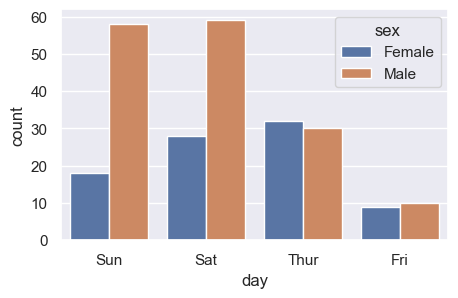

In [339]:
sns.countplot(x = 'day', hue = 'sex', data = df)  # В зависимости от пола

#### 22) Постройте график распределения средней суммы счета в зависимости от пола и проанализируйте результат.

График показывает, что средний чек, оплаченный клиентами-мужчинами, немного больше, чем средний чек клиентов женского пола.

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

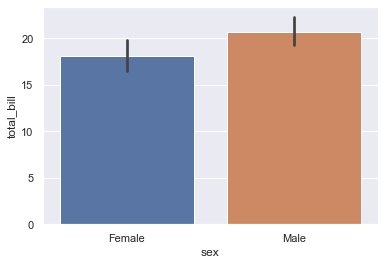

In [268]:
sns.barplot(x = 'sex', y = 'total_bill', data = df)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

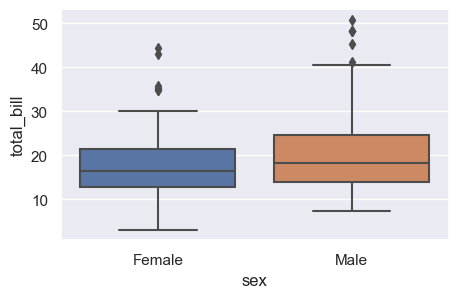

In [352]:
sns.boxplot(x = df.sex, y = df.total_bill)

#### 23) Постройте график распределения минимальной суммы счета в зависимости от пола.

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

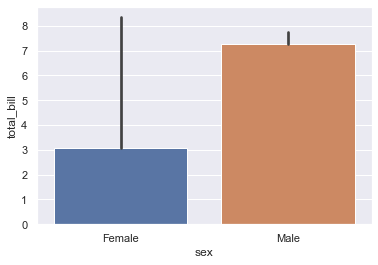

In [286]:
sns.barplot(x = df['sex'], y = df['total_bill'], estimator = np.min)

#### 24) Отобразите на графике, как менялась сумма чаевых в зависимости от дня недели с помощью метода boxplot.

<AxesSubplot:xlabel='day', ylabel='tip'>

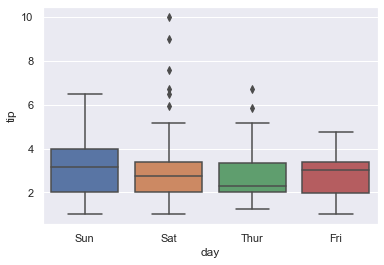

In [292]:
sns.boxplot(x = 'day', y = 'tip', data = df)

#### 25) Отобразите на графике, как изменялось распределение суммы чаевых в разные дни недели в зонах для курящих и некурящих гостей ресторана (метод boxplot).

<AxesSubplot:xlabel='day', ylabel='tip'>

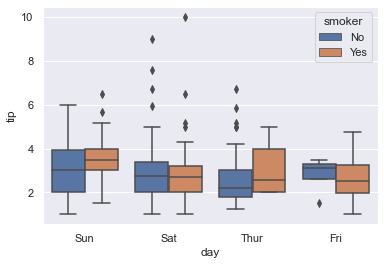

In [294]:
sns.boxplot(x = 'day', y = 'tip', data = df, hue = 'smoker')

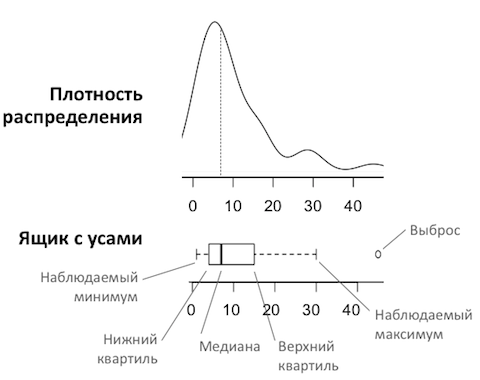

#### 26) Отобразите на графике значение корреляции между признаками.

<AxesSubplot:>

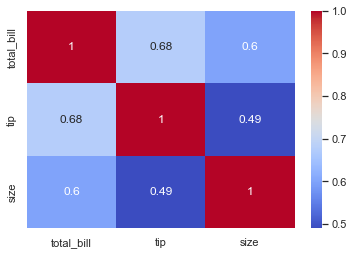

In [304]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

Согласно графику, самая тесная взаимосвязь выявлена между признаками: сумма чека и размер чаевых.

## 4. Plotly

In [31]:
df.iplot()

Функции графика, созданного методом iplot:  
- получение в интерактивном режиме значения признака в отдельных точках;  
- регулирование отображения конкретных признаков (отключение и включение данных признаков без изменения кода);  
- увеличение фрагмента графика;  
- сохранение полученного графика в формате png напрямую из jupyter notebook.

In [33]:
df.iplot(kind = 'bubble', x = 'total_bill', y = 'size', size = 'tip', color = 'pink')

#### 27) Продемонстрируйте на графике, как изменяется разность между суммой чека и размером чаевых для разных заказов.

In [34]:
df[['total_bill', 'tip']].iplot(kind = 'spread')

### ЗАДАНИЕ  
#### Переименуйте признаки и постройте гистограмму признака math_score 

<AxesSubplot:>

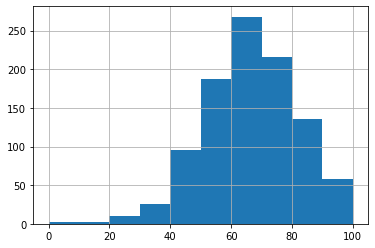

In [3]:
students_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
students_performance = students_performance \
                        .rename(columns = {'parental level of education' : 'parental_level_of_education',
                                           'test preparation course' : 'test_preparation_course', 
                                           'math score' : 'math_score', 'reading score' : 'reading_score',
                                           'writing score' : 'writing_score'})

students_performance.math_score.hist()

<AxesSubplot:title={'center':'Math score'}, ylabel='Frequency'>

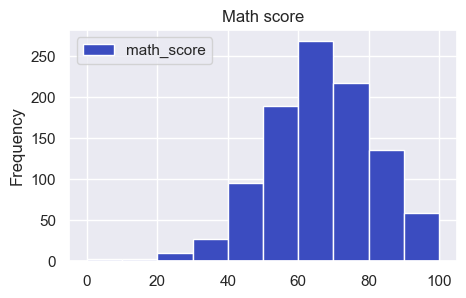

In [359]:
# students_performance.math_score.plot.hist()
students_performance.math_score.plot(kind = 'hist', grid = True, legend = True, colormap = 'coolwarm', title = 'Math score')

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

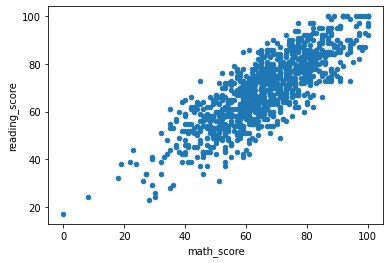

In [8]:
# Построим scatter plot 
# students_performance.plot(kind = 'scatter', x = 'math_score', y = 'reading_score')

students_performance.plot.scatter(x = 'math_score', y = 'reading_score')

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

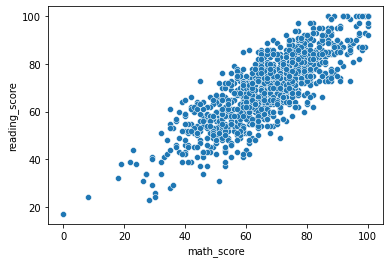

In [11]:
# Построим scatter plot с помощью библиотеки seaborn
sns.scatterplot(x = 'math_score', y = 'reading_score', data = students_performance)

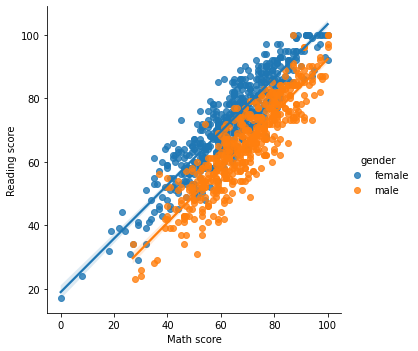

In [18]:
# С помощью библиотеки seaborn построим график, показывающий линейную аппроксимацию взаимосзяви двух переменных
ax = sns.lmplot(x = 'math_score', y = 'reading_score', hue = 'gender', data = students_performance )
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

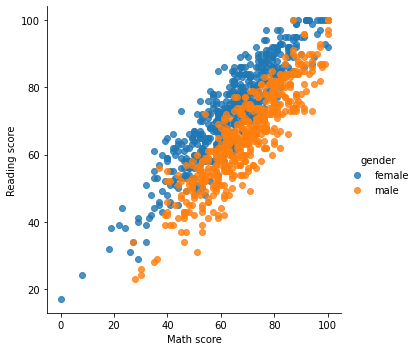

In [26]:
ax = sns.lmplot(x = 'math_score', y = 'reading_score', hue = 'gender', data = students_performance, fit_reg = False )
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

### ЗАДАНИЕ  
#### Какими способами можно отрисовать простой график зависимости зарплаты от даты

In [27]:
# Загрузим датасет
income_df = pd.read_csv('income_step.csv')
income_df

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


<AxesSubplot:ylabel='income'>

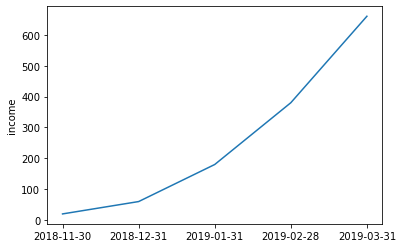

In [70]:
# plt.plot(income_df.index, income_df.income)
# income_df.plot(kind = 'line')
# sns.lineplot(data = income_df)

sns.lineplot(x = income_df.index, y = income_df.income)

### ЗАДАНИЕ    
#### В датасэте 2 признака. Постройте график распределения точек в пространстве этих 2-ух переменных и напишите число кластеров, формируемых наблюдениями.

,x,y
0,1290.992427,603.264780
1,297.664595,903.751786
2,1298.775207,604.277010
3,904.624314,1200.361013
4,1003.205373,403.841251


<AxesSubplot:xlabel='x', ylabel='y'>

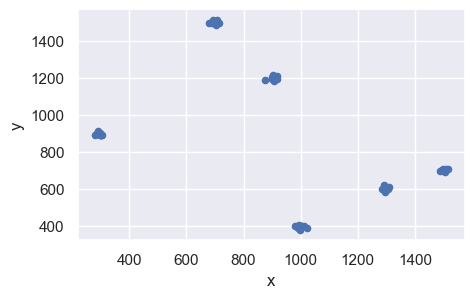

In [371]:
# Загрузим данные
data = pd.read_csv('dataset_209770_6.txt', sep = ' ')
display(data.head())

# data.plot(kind = 'scatter', x = 'x', y = 'y')
# sns.scatterplot(data.iloc[:, 0], data.iloc[:, 1])
data.plot.scatter(x = 'x', y = 'y')

### ЗАДАНИЕ
#### Скачайте данные, представляющие геномные расстояния между видами, и проиллюстрируйте матрицу корреляции признаков.

In [382]:
# Загрузим данные
genome_matrix = pd.read_csv('genome_matrix.csv', index_col = 0)
genome_matrix.head(3)

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052


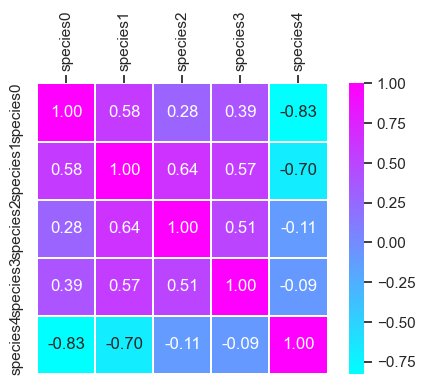

In [401]:
plt.rcParams['figure.figsize'] = (5, 4)
ax = sns.heatmap(data = genome_matrix.corr(), square = True, annot = True, fmt = '.2f', linewidth = 0.1, cmap = "cool")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(rotation = 90)
plt.tight_layout()

### ЗАДАНИЕ
#### Скачайте датасэт Iris, постройте график распределения признаков и проанализируйте результат

In [403]:
# Загрузим данные
iris = pd.read_csv('iris.csv')
iris.head(3)

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0


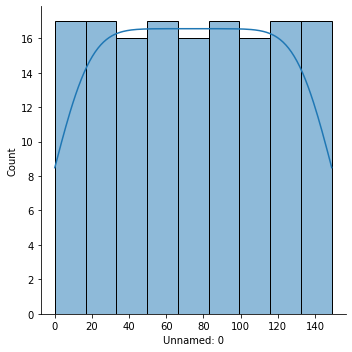

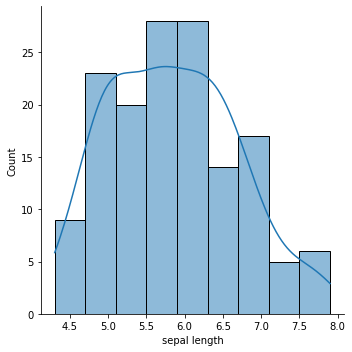

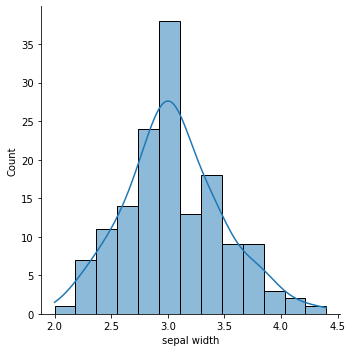

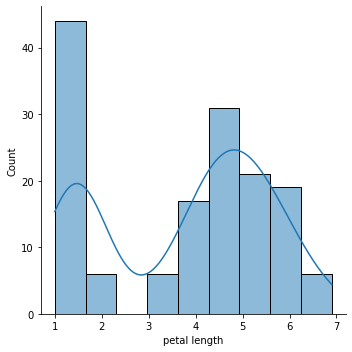

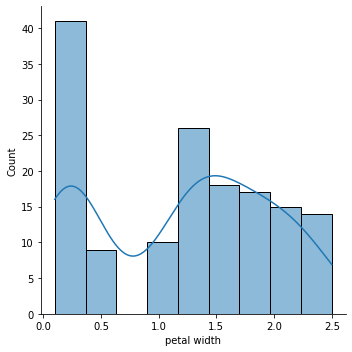

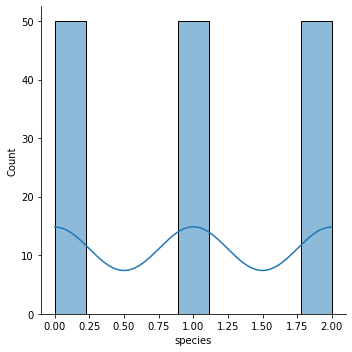

In [72]:
for column in iris:
    sns.displot(iris, x = column, kde = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal length', ylabel='Density'>

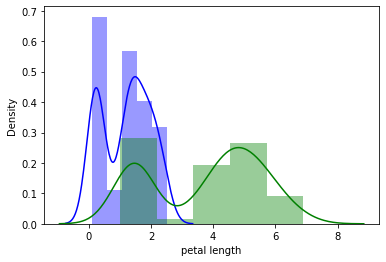

In [73]:
sns.distplot(iris['petal width'], color = "blue")
sns.distplot(iris['petal length'], color ="green")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal length', ylabel='Density'>

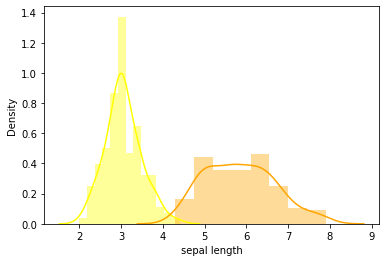

In [134]:
sns.distplot(iris['sepal width'], color = "yellow")
sns.distplot(iris['sepal length'], color = "orange")

- Petal length имеет наибольший размах значений.    
- Petal width и petal length имеют бимодальное распределение.    
-Sepal width и sepal length имеют унимодальное распределение.

### ЗАДАНИЕ
#### Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта прим помощи violin плота.

<AxesSubplot:ylabel='petal length'>

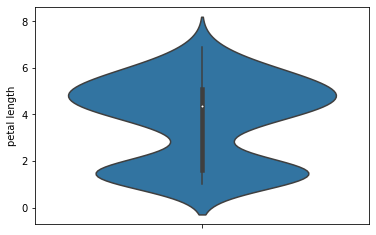

In [150]:
sns.violinplot(y = iris['petal length'])

### ЗАДАНИЕ
#### Постройте pairplot и посмотрите на scatter плоты для каждой из пар признаков. Какая из пар визуально имеет наибольшую корреляцию?

Визуально, согласно графику pairplot, наибольшую корреляцию имеют признаки petal width и petal length.

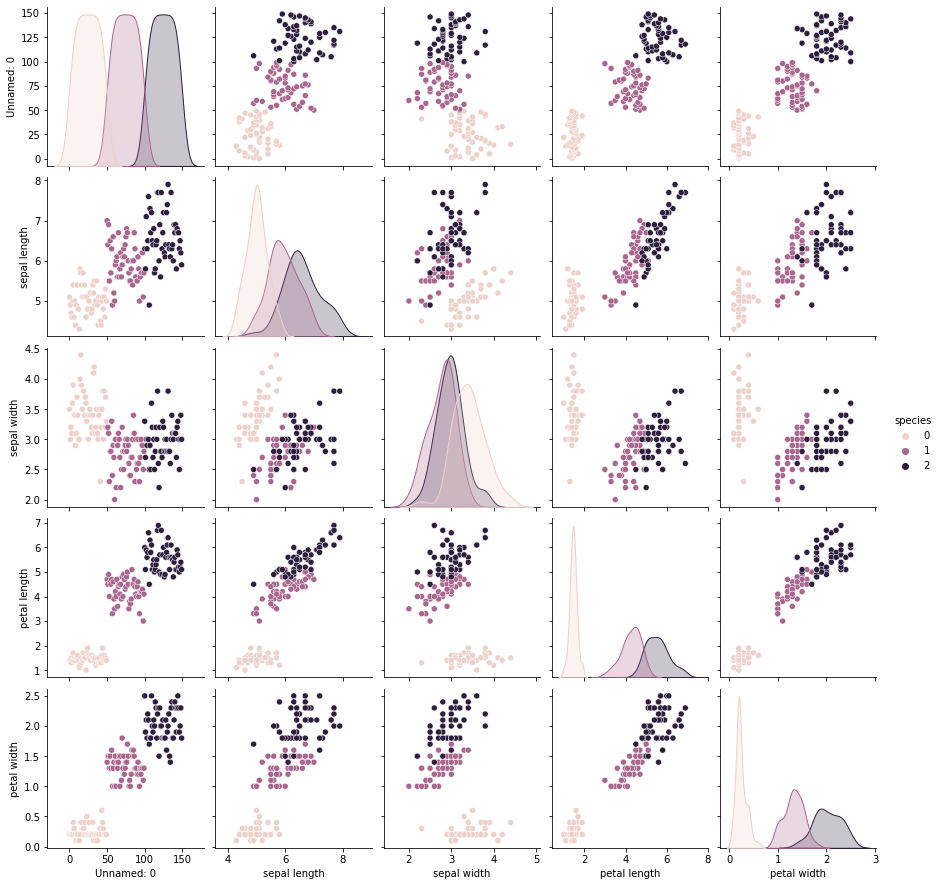

In [153]:
sns.pairplot(iris, hue = 'species')

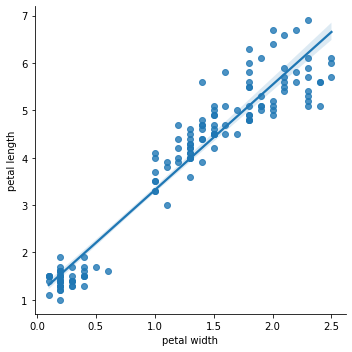

In [157]:
sns.lmplot(x = 'petal width', y = 'petal length', data = iris) 